In [67]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM
from astropy import constants as const
from scipy.interpolate import interp1d

In [68]:
os.chdir("/home/benardorci/SimulationData")
os.getcwd()

'/home/benardorci/SimulationData'

In [69]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_1000.npy")
CheckingEverythingIsAlright = 117

In [70]:
# MassBins, where:  

MassBin1 = []    #         MB < 1e13
MassBin2 = []    # 1e13 <= MB <5e13
MassBin3 = []    # 5e13 <= MB <1e14
MassBin4 = []    # 1e14 <= MB <5e14
MassBin5 = []    # 5e14 <= MB <1e15
MassBin6 = []    #         MB >= 1e15

for m, x, y, z, Vx, Vy, Vz in zip(Halos[:,0], Halos[:,1], Halos[:,2], Halos[:,3], Halos[:,4], Halos[:,5], Halos[:,6]) :
    if m >= 1.0*10**15 :
        MassBin1.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**14 :
        MassBin2.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**14 :
        MassBin3.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**13 :
        MassBin4.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**13 :
        MassBin5.append([m, x, y, z, Vx, Vy, Vz])
    else :
        MassBin6.append([m, x, y, z, Vx, Vy, Vz])

MassBin1 = np.array(MassBin1)
MassBin2 = np.array(MassBin2)
MassBin3 = np.array(MassBin3)
MassBin4 = np.array(MassBin4)
MassBin5 = np.array(MassBin5)
MassBin6 = np.array(MassBin6)

In [71]:
DMP = np.array(DMP)
DMPCopy = DMP.copy()

Radius = 120
HalfHeight = 0

DMP[:,1] = DMP[:,1] + Radius 
DMP[:,2] = DMP[:,2] + Radius 
DMP[:,3] = DMP[:,3] + HalfHeight

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMPCopy[:,0], DMPCopy[:,1], DMPCopy[:,2], DMPCopy[:,3], DMPCopy[:,4], DMPCopy[:,5], DMPCopy[:,6]) :
    if  x < Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
            
    elif  x > 1050-Radius :
        if y < Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1050-Radius :
            if z < HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            elif z > 1050-HalfHeight :
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1050+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #ARISTA
                
        elif z < HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1050+Radius, y+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y < Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y+1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif y > 1050-Radius :
        if z < HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        elif z > 1050-HalfHeight :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+Radius, y-1050+Radius, z+HalfHeight, Vx, Vy, Vz]) #CARA
        
    elif z < HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z+1050+HalfHeight, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1050-HalfHeight :
        NewDMPBoxShell.append([m, x+Radius, y+Radius, z-1050+HalfHeight, Vx, Vy, Vz]) #CARA

    else :
        continue

In [72]:
print(CheckingEverythingIsAlright)

117


In [73]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [74]:
print(CheckingEverythingIsAlright)

117


In [75]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)
DistanceOfRS0dot3 = DistanceOfRS0dot3.value

# -------------------------------------- INTERPOLATION --------------------------------------

MPCMin = z_at_value(cosmo.comoving_distance, 0.001*u.Mpc)
MPCMax = z_at_value(cosmo.comoving_distance, 3300*u.Mpc) # 1050 + 1200 + 1050, box + 0.3 RS + Shell (525 each side)
RSgrid = np.linspace(MPCMin, MPCMax, 50000)
MPCgrid = cosmo.comoving_distance(RSgrid)

MPCtoRSInterpolation = interp1d(MPCgrid, RSgrid)   

# -------------------------------------- INTERPOLATION --------------------------------------

TemporaryFrameOfReference = np.zeros((np.size(NewDMPBox[:,3]),3))
DMPBoxRSandA = np.zeros((np.size(NewDMPBox[:,3]),2))

In [76]:
print(CheckingEverythingIsAlright)

117


In [77]:
ID = 0
Radians = np.radians(3)
Cylinder= []

for QQ in MassBin1[:,0] :

    # New frame of reference (The Halo that was selected).

    TemporaryFrameOfReference[:,0] = NewDMPBox[:,1] - (MassBin1[ID,1] + Radius)
    TemporaryFrameOfReference[:,1] = NewDMPBox[:,2] - (MassBin1[ID,2] + Radius)
    TemporaryFrameOfReference[:,2] = NewDMPBox[:,3] - (MassBin1[ID,3] + HalfHeight) + DistanceOfRS0dot3

    # Redshift of the DMP.

    DMPBoxRSandA[:,0] = MPCtoRSInterpolation(TemporaryFrameOfReference[:,2])
    DMPBoxRSandA[:,0] = DMPBoxRSandA[:,0] + (NewDMPBox[:,6]/const.c.value)*(1/(1+DMPBoxRSandA[:,0]))

    # Angles of the DMP.

    DMPBoxRSandA[:,1] = np.arctan(np.sqrt(TemporaryFrameOfReference[:,0]**2 + TemporaryFrameOfReference[:,1]**2)/TemporaryFrameOfReference[:,2])
    
    ID = ID + 1

    for x,y in zip(DMPBoxRSandA[:,0], DMPBoxRSandA[:,1]) :
        if (0.2 <= x <= 0.5 and y <= Radians) :
            Cylinder.append([x, y])

Cylinder = np.array(Cylinder)

In [78]:
print(TemporaryFrameOfReference[:,2].min())

298.3617738558554


In [79]:
Cylinder[0,:]

array([0.28770155, 0.03529498])

In [80]:
np.size(Cylinder)

22160378

In [81]:
#np.savetxt("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.txt",FinalVelocities,fmt='%s')

In [82]:
print(CheckingEverythingIsAlright)

117


In [83]:
#np.save("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.npy",FinalVelocities)
#np.save("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.npy",FinalVelocities)

In [84]:
print(CheckingEverythingIsAlright)

117


In [85]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin#HistogramsDS1000.png")

In [86]:
print(CheckingEverythingIsAlright)

117


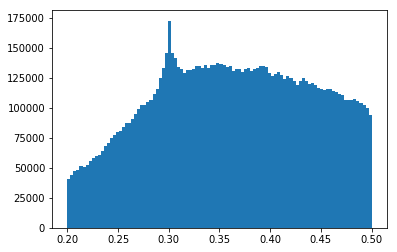

In [87]:
plt.hist(Cylinder[:,0], bins=100) #density=True
plt.show()
#plt.savefig("/home/benardorci/SimulationData/MassBin#HistogramsDS1000Height###.png")
#plt.savefig("/calvin1/benardorci/MassBin3HistogramsDS1000Height2Radius0dot5.png")

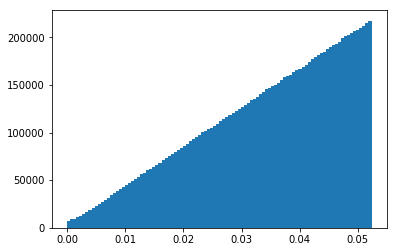

In [88]:
plt.hist(Cylinder[:,1], bins=100) #density=True
plt.show()

In [93]:
FinalVelocitys = const.c.value*(Cylinder[:,0]-0.3)/(1.3*1000) # the 1000 is used to normalize.
V = []

for x in FinalVelocitys :
    if (-3000 <= x <= 3000) :
        V.append(x)

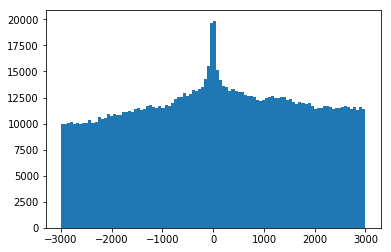

In [94]:
plt.hist(V, bins=100)
plt.show()

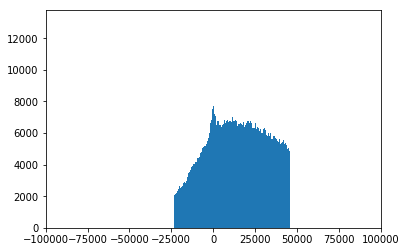

In [95]:
plt.hist(FinalVelocitys, bins=2000)
plt.xlim(-100000, 100000)
plt.show()

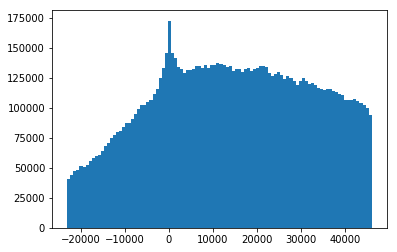

In [96]:
plt.hist(FinalVelocitys, bins=100)
plt.show()

In [97]:
cosmo.angular_diameter_distance(0.3)

<Quantity 918.76682286 Mpc>